Spectral Partitioning:

The main motivation of spectral partitioning is that there is an inituition that the second lowest vibrational mode of a vibrating string naturally divides the string in half. 


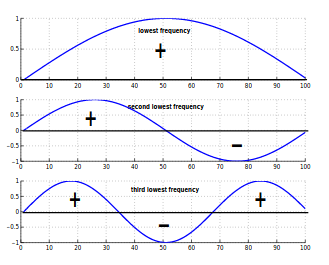

Source: https://www.fei.vsb.cz/export/sites/fei/470/.content/galerie-souboru/zaverecnePrace/mgr/kabelikova_ing.pdf

The same idea when applied to the eigenvectors of a graph, it can be obtain the partitioning.

The lowest value of eigenvalue of the Laplacian matrix is zero and its coressponding eigenvector possess no information about the graph. 

What is Laplacian Matrix (L)?

It is a matrix representing the graph. L = D-A, D: diagonal matrix, A: Adjacency matrix

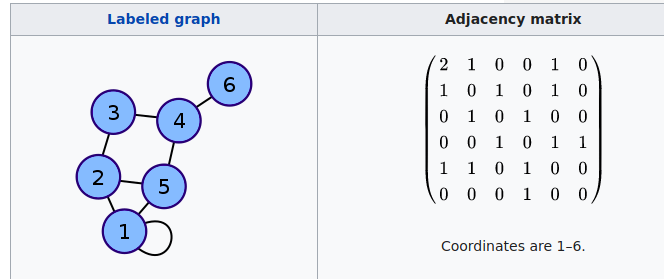

Img source: https://en.wikipedia.org/wiki/Adjacency_matrix


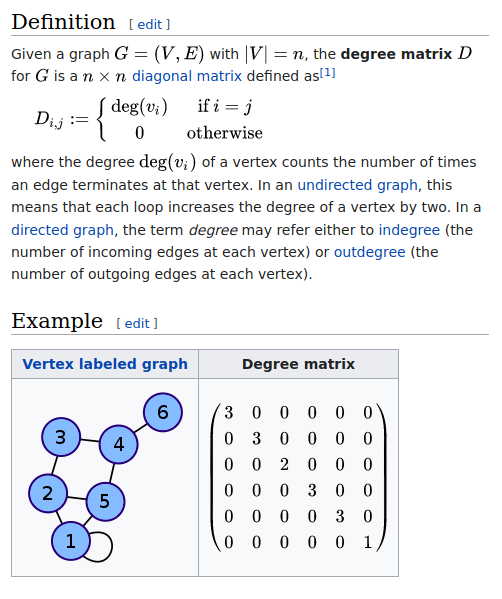

Img source: https://en.wikipedia.org/wiki/Adjacency_matrix

Laplacian Matrix together with Krichhoff's  theorem, it can be applied to compute the number of spanning tree for a given graph.

More interestingly, second lowest eigenvector (also called as Fieldler Vector) because it substantially single-handedly represent the graph. 

First, spectral partitioning algorithm:

1. Bisection spectral partitioning algorithm:
In this method, first the Fieldler vector is computed and its median is estimated. Following, bisection of the graph is done keeping median as the main border of partitioning.

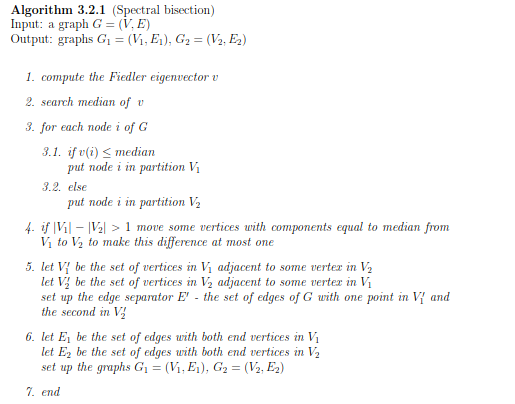


Source: https://www.fei.vsb.cz/export/sites/fei/470/.content/galerie-souboru/zaverecnePrace/mgr/kabelikova_ing.pdf

Let implement the algorithm in Python:

In [1]:
# assigning random graphs

V = {1, 2, 3, 4, 5} # vertices
E = {12, 13, 24, 34, 45} #edge

# creating dictionary with graph elements

graph ={"1" : ["2", "3"],
       "2" : ["1", "4"],
       "3" : ["1", "4"],
       "4" : ["5"],
       "5" : ["4"]}
print(graph)

{'1': ['2', '3'], '2': ['1', '4'], '3': ['1', '4'], '4': ['5'], '5': ['4']}


Next, step is to find the eigen vectors.

Let a =1, b = 2, c = 3, d = 4 & e= 5

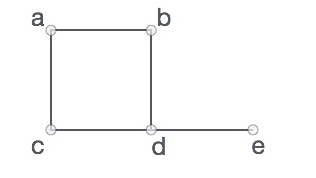


In [2]:
from numpy.linalg import eig

values, vectors = eig(V) # selected only V not E because our main goal is to work on vertices, after all E can be easily retained

print ("eigen values: ", values, "\n", "eigen vectors: ", vectors)


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

Opps! Here is a problem! Hence, since we already know that Laplacian matrix represents the graph, lets create the Laplacian matrix of the above graph. 

L = D -A

In [3]:
import numpy as np

# for D:
r1=([2, 0, 0, 0, 0])
r2=([0, 2, 0, 0, 0])
r3=([0, 0, 2, 0, 0])
r4=([0, 0, 0, 3, 0])
r5=([0, 0, 0, 0, 1])

D =np.matrix([r1,r2,r3,r4,r5])


#for A:
r1=([0, 1, 1, 0, 0])
r2=([1, 0, 0, 1, 0])
r3=([1, 0, 0, 1, 0])
r4=([0, 1, 1, 0, 1])
r5=([0, 0, 0, 1, 0])

A =np.matrix([r1,r2,r3,r4,r5])

print ('Diagonal Matrix: \n \n', D)

print ('\n Adjacency Matrix: \n \n', A)



Diagonal Matrix: 
 
 [[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 1]]

 Adjacency Matrix: 
 
 [[0 1 1 0 0]
 [1 0 0 1 0]
 [1 0 0 1 0]
 [0 1 1 0 1]
 [0 0 0 1 0]]



Now, getting Laplacian Matrix

Laplacian matrix: 
 
 [[ 2 -1 -1  0  0]
 [-1  2  0 -1  0]
 [-1  0  2 -1  0]
 [ 0 -1 -1  3 -1]
 [ 0  0  0 -1  1]]


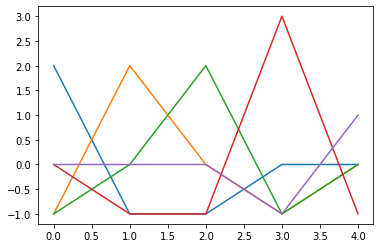

In [4]:
L = D-A

print ("Laplacian matrix: \n \n", L)

import matplotlib.pyplot as plt

plt.plot(L)

plt.show()

In [5]:
eigV =[]
from numpy.linalg import eig

values, vectors = eig(L) # selected only V not E because our main goal is to work on vertices, after all E can be easily retained

print ("eigen values: ", values, "\n \n", "eigen vectors: ", vectors)

eignV=vectors

eigen values:  [ 4.48119430e+00  2.68889218e+00 -6.87936552e-16  8.29913513e-01
  2.00000000e+00] 
 
 eigen vectors:  [[ 3.37998097e-01 -7.03081478e-01  4.47213595e-01  4.37531395e-01
   6.75658023e-16]
 [-4.19319477e-01  2.42173667e-01  4.47213595e-01  2.55974786e-01
  -7.07106781e-01]
 [-4.19319477e-01  2.42173667e-01  4.47213595e-01  2.55974786e-01
   7.07106781e-01]
 [ 7.02415001e-01  5.36249932e-01  4.47213595e-01 -1.38018756e-01
  -3.88578059e-16]
 [-2.01774144e-01 -3.17515788e-01  4.47213595e-01 -8.11462211e-01
   5.55111512e-17]]


In [6]:
#getting magnitude of vectors

import numpy as np

ordered = []
for mag in eignV:
    mag1 = np.linalg.norm(mag)
    print (mag1)
    ordered.append(mag1)
    
print ("\n \n Sorted:", sorted (ordered))

1.0000000000000004
0.9999999999999998
1.0
0.9999999999999998
0.9999999999999998

 
 Sorted: [0.9999999999999998, 0.9999999999999998, 0.9999999999999998, 1.0, 1.0000000000000004]


# Getting second lowest eigen   (Fiedler) vector

It can be observed that the second lowest eigen vector is of corresponding vector with magnitude equal to 1.0, which is [-4.19319477e-01  2.42173667e-01  4.47213595e-01  2.55974786e-01 7.07106781e-01]

and let say it be V vector

In [7]:
v = np.matrix([-4.19319477e-01, 2.42173667e-01, 4.47213595e-01, 2.55974786e-01, 7.07106781e-01])

print ("Fiedler Vector:\n", v)

Fiedler Vector:
 [[-0.41931948  0.24217367  0.4472136   0.25597479  0.70710678]]


# Next step is to find the median of Fiedler vector (v)

We will use statistics for getting median of our vector.


In [8]:
import numpy as np

med = np.median(v);

#print (sorted(med))

print("median of v", med)

print ("\n \nThe median of the v is:", np.median(v, axis=1))

median of v [[-0.41931948  0.24217367  0.25597479  0.4472136   0.70710678]]

 
The median of the v is: [[0.25597479]]


# Clustering the v into two groups

Let v1 and v2 be the two clusters. v1 has all value which has magnitude less than or equal to median and rest value will be in v2.

In [9]:
v1 = []
v2 = []

med = 0.25597479 
v = [-0.41931948,  0.24217367,  0.4472136,   0.25597479,  0.70710678]


for i in v:
  if i<=med:
    v1.append(i)
  else:
    v2.append(i)
        
print("v1 =", v1)
print("\n \n v2 =", v2)

v1 = [-0.41931948, 0.24217367, 0.25597479]

 
 v2 = [0.4472136, 0.70710678]


# Checking |v1|-|v2|>1 condition

We are trying to make the difference between v1 and v2 at most one. 

But, even by looking it is visible that no way there could be no possible case when v1-v2 >1 . Hence, we are skipping it.

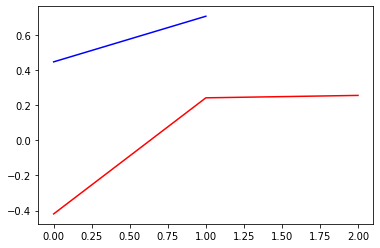

In [10]:
# Lets plot vectors v1 and v2

import matplotlib.pyplot as plt

plt.plot(v1, c = 'r')
plt.plot(v2, c = 'b')
plt.show()

# Final step is to present the solutions.

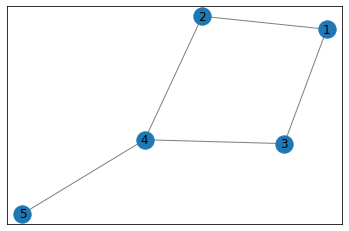

In [11]:
# defining function to visualize the graphs
import networkx as nx

def draw_graph(g):
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_labels(g, pos)
    nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.5)

graph = nx.Graph()

graph.add_edges_from([[1, 2], [1, 3], [2, 1], [2, 4], [3, 1], [3, 4], [4, 5], [5, 4]])
                      
draw_graph(graph)

In [12]:
eigV =[]
from numpy.linalg import eig

values, vectors = eig(L) # selected only V not E because our main goal is to work on vertices, after all E can be easily retained

print ("eigen values: ", values, "\n \n", "eigen vectors: ", vectors)

eignV=vectors

eigen values:  [ 4.48119430e+00  2.68889218e+00 -6.87936552e-16  8.29913513e-01
  2.00000000e+00] 
 
 eigen vectors:  [[ 3.37998097e-01 -7.03081478e-01  4.47213595e-01  4.37531395e-01
   6.75658023e-16]
 [-4.19319477e-01  2.42173667e-01  4.47213595e-01  2.55974786e-01
  -7.07106781e-01]
 [-4.19319477e-01  2.42173667e-01  4.47213595e-01  2.55974786e-01
   7.07106781e-01]
 [ 7.02415001e-01  5.36249932e-01  4.47213595e-01 -1.38018756e-01
  -3.88578059e-16]
 [-2.01774144e-01 -3.17515788e-01  4.47213595e-01 -8.11462211e-01
   5.55111512e-17]]


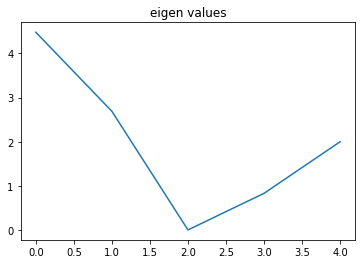

In [13]:
plt.plot(values)
plt.title('eigen values')
plt.show()

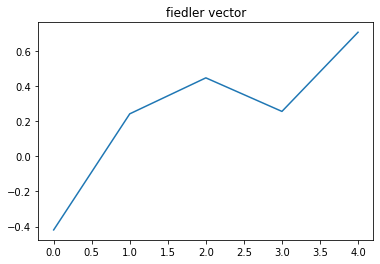

In [14]:

v = [-4.19319477e-01, 2.42173667e-01, 4.47213595e-01, 2.55974786e-01, 7.07106781e-01]

plt.plot(v)
plt.title('fiedler vector')
plt.show()


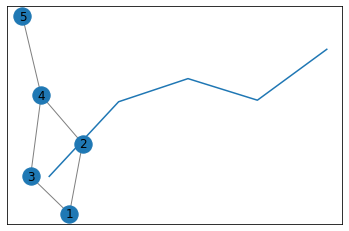

In [18]:


plt.plot(v)

draw_graph(graph)

plt.show()



Not much clear clustering. Lets check another way.



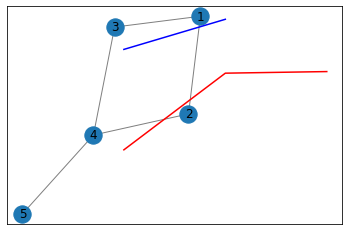

In [19]:

draw_graph(graph)

plt.plot(v1, c = 'r')
plt.plot(v2, c = 'b')



plt.show()

Roughly understandable?

It can be infer that node 1 and 3 belongs to a cluster and rest of the nodes namely 2, 4 and 5 belongs to another clusters.


Lets repeat the same process for even more complex graph

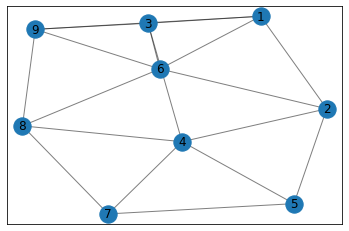

In [66]:
# defining function to visualize the graphs
import networkx as nx

def draw_graph(g):
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g, pos)
    nx.draw_networkx_labels(g, pos)
    nx.draw_networkx_edges(g, pos, width = 1.0, alpha = 0.5)

graph = nx.Graph()

graph.add_edges_from([[1, 2], [1, 3], [1, 6], [2, 1], [2, 4], [2, 5], [3, 1], [3, 4], [4, 5], [4, 7], [5, 4], [6, 2], [6, 3], [6, 9], [7, 8], [7, 5], [8, 4], [8, 6], [9, 1], [9, 3], [9, 8]])
                      
                      
draw_graph(graph)

In [75]:
import numpy as np

A = np.matrix ([[0, 1, 1, 0, 0, 1, 0, 0, 0],
               [1, 0, 0, 1, 1, 1, 0, 0, 0],
               [1, 0, 0, 0, 0, 1, 0, 0, 1],
               [0, 1, 0, 0, 1, 1, 1, 1, 0],
               [0, 1, 0, 1, 0, 0, 1, 0, 0],
               [1, 1, 1, 1, 0, 0, 0, 1, 1],
               [0, 0, 0, 1, 1, 0, 0, 1, 0],
               [0, 0, 0, 1, 0, 1, 1, 0, 1],
               [0, 0, 1, 0, 0, 1, 0, 1, 0]])

D = np.matrix ([[3, 0, 0, 0, 0, 0, 0, 0, 0 ],
               [0, 4, 0, 0, 0, 0, 0, 0, 0 ],
               [0, 0, 3, 0, 0, 0, 0, 0, 0 ],
               [0, 0, 0, 5, 0, 0, 0, 0, 0 ],
               [0, 0, 0, 0, 3, 0, 0, 0, 0 ],
               [0, 0, 0, 0, 0, 6, 0, 0, 0 ],
               [0, 0, 0, 0, 0, 0, 3, 0, 0 ],
               [0, 0, 0, 0, 0, 0, 0, 4, 0 ],
               [0, 0, 0, 0, 0, 0, 0, 0, 3 ]])
    
print('Adjacency matrix:\n', A)
print('\n \nDiagonal matrix:\n', D)


Adjacency matrix:
 [[0 1 1 0 0 1 0 0 0]
 [1 0 0 1 1 1 0 0 0]
 [1 0 0 0 0 1 0 0 1]
 [0 1 0 0 1 1 1 1 0]
 [0 1 0 1 0 0 1 0 0]
 [1 1 1 1 0 0 0 1 1]
 [0 0 0 1 1 0 0 1 0]
 [0 0 0 1 0 1 1 0 1]
 [0 0 1 0 0 1 0 1 0]]

 
Diagonal matrix:
 [[3 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0]
 [0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 3]]


In [77]:
L = D-A

print ("Laplacian matrix: \n \n", L)



Laplacian matrix: 
 
 [[ 3 -1 -1  0  0 -1  0  0  0]
 [-1  4  0 -1 -1 -1  0  0  0]
 [-1  0  3  0  0 -1  0  0 -1]
 [ 0 -1  0  5 -1 -1 -1 -1  0]
 [ 0 -1  0 -1  3  0 -1  0  0]
 [-1 -1 -1 -1  0  6  0 -1 -1]
 [ 0  0  0 -1 -1  0  3 -1  0]
 [ 0  0  0 -1  0 -1 -1  4 -1]
 [ 0  0 -1  0  0 -1  0 -1  3]]


In [78]:
eigV =[]
from numpy.linalg import eig

values, vectors = eig(L) # selected only V not E because our main goal is to work on vertices, after all E can be easily retained

print ("eigen values: ", values, "\n \n", "eigen vectors: ", vectors)

eignV=vectors

eigen values:  [8.88178420e-16 7.21695885e+00 1.29542355e+00 2.19806226e+00
 6.16913356e+00 5.24697960e+00 4.69803027e+00 3.55495813e+00
 3.62045377e+00] 
 
 eigen vectors:  [[ 3.33333333e-01  1.37337907e-01  3.38140332e-01  5.21120889e-01
   1.28028905e-01 -2.31920614e-01 -4.80000829e-01 -4.17906506e-01
   9.43191769e-02]
 [ 3.33333333e-01  1.51569318e-01 -7.80053924e-02  4.17906506e-01
  -4.38635409e-01  5.21120889e-01  1.75530491e-01  2.31920614e-01
   3.69619824e-01]
 [ 3.33333333e-01  1.41761778e-01  4.92007577e-01  1.32905519e-16
  -1.33211032e-01 -1.09560792e-15  4.59115063e-01  3.71348439e-15
  -6.31022354e-01]
 [ 3.33333333e-01  3.42195296e-01 -2.48330164e-01  5.11714930e-16
   7.26329984e-01 -7.44334521e-16  3.84714470e-01 -5.61349229e-16
   1.85911076e-01]
 [ 3.33333333e-01 -9.46460628e-02 -4.63165577e-01  2.31920614e-01
  -6.90058428e-02 -4.17906506e-01 -2.07649620e-01  5.21120889e-01
  -3.42824282e-01]
 [ 3.33333333e-01 -8.72479401e-01  1.62383862e-01  3.29522652e-16
   1.

In [79]:
#getting magnitude of vectors

import numpy as np

ordered = []
for mag in eignV:
    mag1 = np.linalg.norm(mag)
    print (mag1)
    ordered.append(mag1)
    
print ("\n \n Sorted:", sorted (ordered))

1.0000000000000004
0.9999999999999992
1.0
0.9999999999999999
1.0000000000000009
1.0000000000000002
0.9999999999999996
1.0
0.9999999999999993

 
 Sorted: [0.9999999999999992, 0.9999999999999993, 0.9999999999999996, 0.9999999999999999, 1.0, 1.0, 1.0000000000000002, 1.0000000000000004, 1.0000000000000009]


i.e. second lowest eigen vector is vector corresponding to magnitude of 0.9999999999999993 which is [ 3.33333333e-01  1.37337907e-01  3.38140332e-01 -5.21120889e-01
   1.28028905e-01  2.31920614e-01 -4.80000829e-01  4.17906506e-01
   9.43191769e-02]]


|v| is: [0.333333333, 0.137337907, 0.338140332, -0.521120889, 0.128028905, 0.231920614, -0.480000829, 0.417906506, 0.0943191769]

 
 median of v 0.137337907


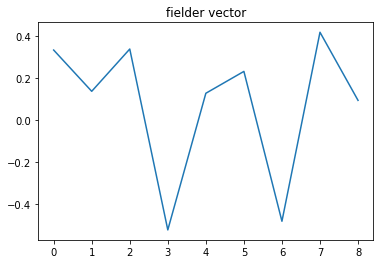

In [92]:
v = [ 3.33333333e-01,  1.37337907e-01,  3.38140332e-01, -5.21120889e-01,
   1.28028905e-01,  2.31920614e-01, -4.80000829e-01,  4.17906506e-01,
   9.43191769e-02]

print ('|v| is:', v)

import numpy as np

med = np.median(v);


print("\n \n median of v", med)

import matplotlib.pyplot as plt

plt.plot(v)

plt.title('fielder vector')

plt.show()


In [89]:
v1 = []
v2 = []

for i in v:
  if i<=med:
    v1.append(i)
  else:
    v2.append(i)
        
print("v1 =", v1)
print("\n \n v2 =", v2)

v1 = [0.137337907, -0.521120889, 0.128028905, -0.480000829, 0.0943191769]

 
 v2 = [0.333333333, 0.338140332, 0.231920614, 0.417906506]


Checking |v1|-|v2|>1 condition

We are trying to make the difference between v1 and v2 at most one.

But, even by looking it is visible that no way there could be no possible case when v1-v2 >1 . Hence, we are skipping it.


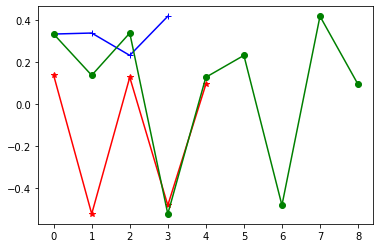

In [97]:
# Lets plot vectors v1 and v2

import matplotlib.pyplot as plt

plt.plot(v1, c = 'r', marker = '*')  #v1 vector
plt.plot(v2, c = 'b', marker = '+') #v2 vector
plt.plot(v, marker = 'o', c = 'g') # fiedler vector
plt.show()

Lets see how it clustered.

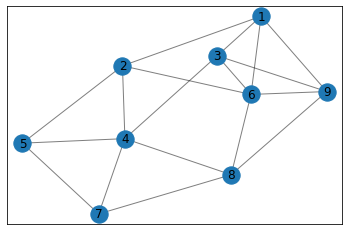

In [116]:
draw_graph(graph)

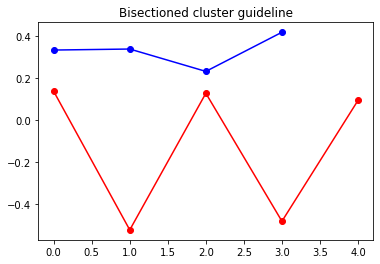

In [134]:
plt.plot(v2, c = 'b', marker = 'o') #v2 vector

plt.plot(v1, c = 'r', marker = 'o')  #v1 vector

plt.title ('Bisectioned cluster guideline')

plt.show()